# diabete_predication_model


#about dataset

In [370]:
'''
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).


Columns	Description
Pregnancies----To express the Number of pregnancies
Glucose	----to express the Glucose level in blood
BloodPressure ----	To express the Blood pressure measurement
SkinThickness ----	To express the thickness of the skin
Insulin ----	To express the Insulin level in blood
BMI ----	To express the Body mass index
DiabetesPedigreeFunction ----	To express the Diabetes percentage
Age ----	To express the age
Outcome ----To express the final result 1 is Yes and 0 is No

'''

'\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney\nDiseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,\nbased on certain diagnostic measurements included in the dataset. Several constraints were placed\non the selection of these instances from a larger database. In particular, all patients here are females\nat least 21 years old of Pima Indian heritage.2\nFrom the data set in the (.csv) File We can find several variables, some of them are independent\n(several medical predictor variables) and only one target dependent variable (Outcome).\n\n\nColumns\tDescription\nPregnancies----To express the Number of pregnancies\nGlucose\t----to express the Glucose level in blood\nBloodPressure ----\tTo express the Blood pressure measurement\nSkinThickness ----\tTo express the thickness of the skin\nInsulin ----\tTo express the Insulin level in blood\nBMI ----\tTo express the Body mass index\nDiabetesPedigre

#Exploratory Data Analytics / Root Cause Analytics
Domain Exploration
Understand the relevant business process, business impact Common challenges and beleifs Sources of data and external factors

#Data Collection and Data Exploration
Collect data from multiple units of business, prepare the dataset Perform a generic exploration on data to identify common challenges in data quality

#Data Cleaning
Handling duplicates, unwanted columns, missing values, outliers

#EDA / RCA
Data Visualization

Univariate Analysis, Bivariate Analysis, Multivariate Analysis, Statistical methods

#Correlation Analysis 
ANOVA, Chi Square Test,

#1. data collection and data explorations

In [371]:
#import the all librarys that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
# loading the dataset into dataframe
df=pd.read_csv("diabetes.csv")

In [373]:
# to view the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [374]:
# to know the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [375]:
# to know stat about the dataset
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#data cleaning

#check the duplicates

In [376]:
# to see the duplicates value in dataset the function is
df.duplicated().sum()

0

# remove the unwanted colunms

In [377]:
# to remove colunms and row  the function is
df.drop(columns=["SkinThickness","Age"],axis=1,inplace=True)

In [378]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1


#remove the null values

In [379]:
# to chek the null value in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

# find the outlier

In [380]:
# to find the outliers
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Outcome                     0.635017
dtype: float64

In [381]:
df["Insulin"]=np.sqrt(df["Insulin"])
df["Insulin"].skew()

0.6299554383696059

In [382]:
q1=df["BloodPressure"].quantile(0.25)
q2=df["BloodPressure"].quantile(0.75)

In [383]:
q1

62.0

In [384]:
q2

80.0

In [385]:
df["BloodPressure"]=np.where(df["BloodPressure"]<q1,q1,df["BloodPressure"])
df["BloodPressure"]=np.where(df["BloodPressure"]>q2,q2,df["BloodPressure"])

In [386]:
df["BloodPressure"].skew()

-0.05565802007337371

In [387]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -0.055658
Insulin                     0.629955
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Outcome                     0.635017
dtype: float64

In [388]:
df["DiabetesPedigreeFunction"]=np.sqrt(df["DiabetesPedigreeFunction"])
df["DiabetesPedigreeFunction"].skew()

0.9018017197488095

In [389]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -0.055658
Insulin                     0.629955
BMI                        -0.428982
DiabetesPedigreeFunction    0.901802
Outcome                     0.635017
dtype: float64

#correlation

In [390]:
# to check the correlation the function is 
corr=df.corr()

In [391]:
corr

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Pregnancies,1.000000,0.129459,0.207421,-0.118077,0.017683,-0.030336,0.221898
Glucose,0.129459,1.000000,0.207536,0.238519,0.221071,0.127247,0.466581
BloodPressure,0.207421,0.207536,1.000000,-0.018926,0.286187,0.041914,0.144738
Insulin,-0.118077,0.238519,-0.018926,1.000000,0.190503,0.204892,0.072343
BMI,0.017683,0.221071,0.286187,0.190503,1.000000,0.144612,0.292695
DiabetesPedigreeFunction,-0.030336,0.127247,0.041914,0.204892,0.144612,1.000000,0.180998
Outcome,0.221898,0.466581,0.144738,0.072343,0.292695,0.180998,1.000000


#Exploratory Data Analytics

#UNIVARATE ANALYSIS

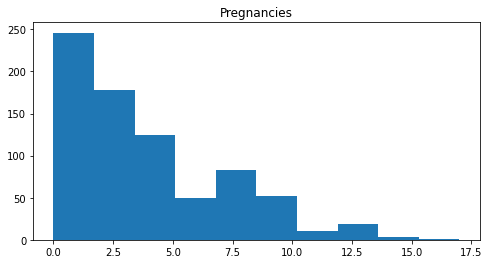

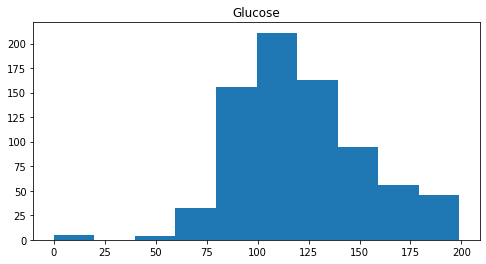

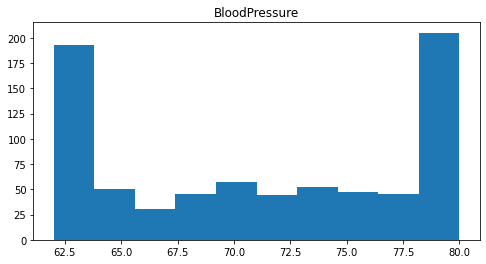

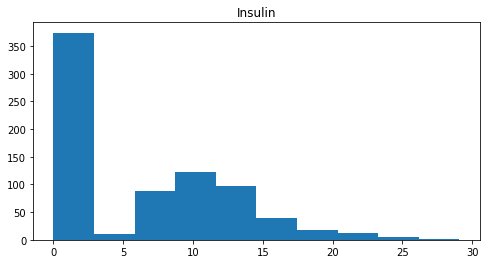

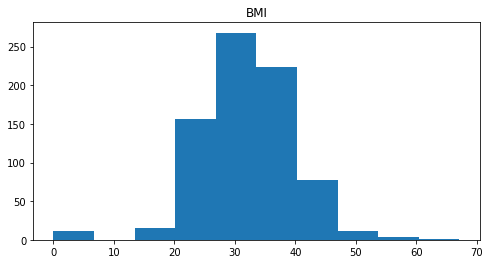

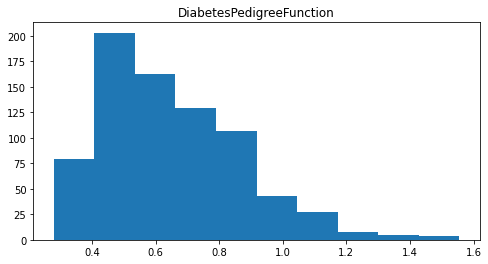

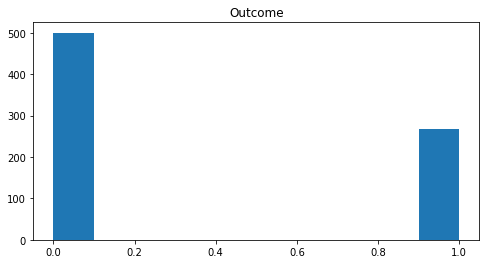

In [392]:
#  compare all attributes in dataset to came to the conclusion
nums = ["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Outcome"]
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

#Bivariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


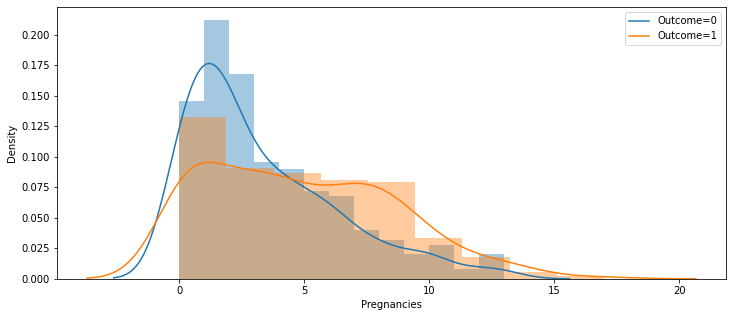

In [393]:
#Pregnancies v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["Pregnancies"][df.Outcome==0])
sns.distplot(df['Pregnancies'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


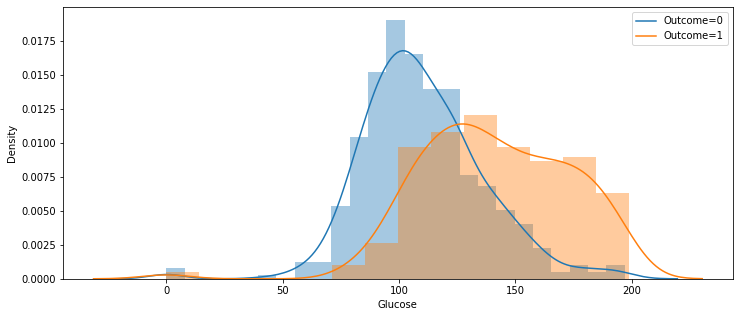

In [394]:
#Glucose v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["Glucose"][df.Outcome==0])
sns.distplot(df['Glucose'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


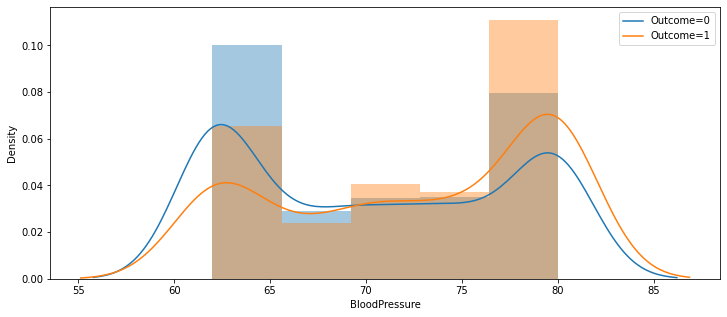

In [395]:
#BloodPressure v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["BloodPressure"][df.Outcome==0])
sns.distplot(df['BloodPressure'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


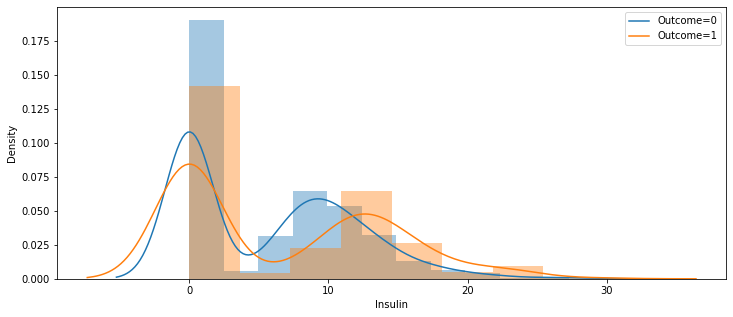

In [396]:
#Insulin v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["Insulin"][df.Outcome==0])
sns.distplot(df['Insulin'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


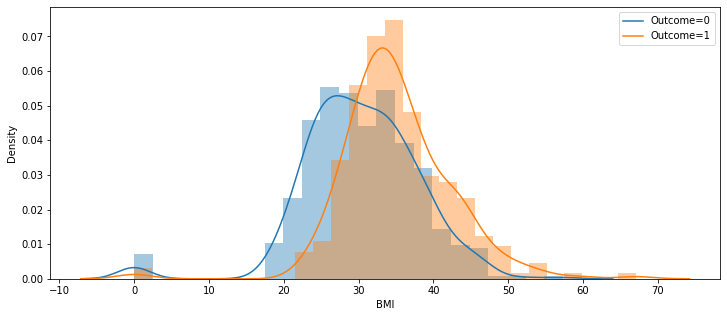

In [397]:
#BMI v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["BMI"][df.Outcome==0])
sns.distplot(df['BMI'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


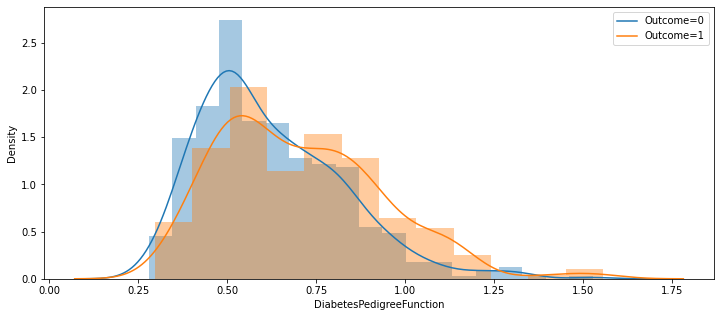

In [398]:
#DiabetesPedigreeFunction v/s Outcome
plt.figure(figsize=(12,5))
sns.distplot(df["DiabetesPedigreeFunction"][df.Outcome==0])
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

#building the model

separating the indepenceies and depenceies variable as x and y

In [399]:
x=df.drop("Outcome",axis=1)

In [400]:
x

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72.0,0.000000,33.6,0.791833
1,1,85,66.0,0.000000,26.6,0.592453
2,8,183,64.0,0.000000,23.3,0.819756
3,1,89,66.0,9.695360,28.1,0.408656
4,0,137,62.0,12.961481,43.1,1.512614
...,...,...,...,...,...,...
763,10,101,76.0,13.416408,32.9,0.413521
764,2,122,70.0,0.000000,36.8,0.583095
765,5,121,72.0,10.583005,26.2,0.494975
766,1,126,62.0,0.000000,30.1,0.590762


In [401]:
# standarzies all value in datset in one range of values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [402]:
X

array([[ 0.63994726,  0.84832379,  0.10935143, -0.91502233,  0.20401277,
         0.64652068],
       [-0.84488505, -1.12339636, -0.72628936, -0.91502233, -0.68442195,
        -0.27524256],
       [ 1.23388019,  1.94372388, -1.0048363 , -0.91502233, -1.10325546,
         0.77561115],
       ...,
       [ 0.3429808 ,  0.00330087,  0.10935143,  0.69079073, -0.73518964,
        -0.725895  ],
       [-0.84488505,  0.1597866 , -1.28338323, -0.91502233, -0.24020459,
        -0.28305709],
       [-0.84488505, -0.8730192 , -0.1691955 , -0.91502233, -0.20212881,
        -0.41950234]])

In [403]:
y=df["Outcome"]

In [404]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [405]:
print(X)
print(y)

[[ 0.63994726  0.84832379  0.10935143 -0.91502233  0.20401277  0.64652068]
 [-0.84488505 -1.12339636 -0.72628936 -0.91502233 -0.68442195 -0.27524256]
 [ 1.23388019  1.94372388 -1.0048363  -0.91502233 -1.10325546  0.77561115]
 ...
 [ 0.3429808   0.00330087  0.10935143  0.69079073 -0.73518964 -0.725895  ]
 [-0.84488505  0.1597866  -1.28338323 -0.91502233 -0.24020459 -0.28305709]
 [-0.84488505 -0.8730192  -0.1691955  -0.91502233 -0.20212881 -0.41950234]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


spliting the dataset into training datset and testing dataset

In [406]:
# this is step we are going to split the dataset into train_dataset and test_dataset and import library from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,stratify=y,random_state=0)

In [407]:
X_train.shape

(614, 6)

In [408]:
y_train.shape

(614,)

#support vector machine 

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:



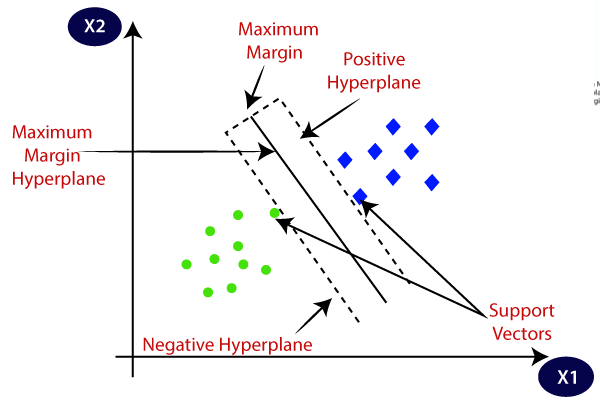

# building the model

In [409]:
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

prediction

In [410]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

#score

In [411]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("accuracy_score:",score)

accuracy_score: 0.7662337662337663


In [412]:
from sklearn.metrics import recall_score
score=recall_score(y_pred,y_test)
print("recall_score:",score)

recall_score: 0.725


In [413]:
from sklearn.metrics import precision_score
score=precision_score(y_pred,y_test)
print("precision_score:",score)

precision_score: 0.5370370370370371


In [414]:
from sklearn.metrics import confusion_matrix
score=confusion_matrix(y_pred,y_test)
print("confusion_matrix:",score)

confusion_matrix: [[89 25]
 [11 29]]


# saving the model

In [415]:
import pickle 
result="diebetes_prediction_model.csv"
pickle.dump(model,open("diabetes_model.sav","wb"))

# to deploy the model in streamlit ( code )

In [416]:
'''import pickle 
import streamlit as st
import numpy as np

lod=pickle.load(open("C:/Users/harin/Pictures/diabetes_model.sav","rb"))


def status( vari ):
    vari1=np.array(vari)
    vari2=vari1.reshape(1,-1)
    predi=lod.predict(vari2)
    print(predi)
    
    if(predi[0]==1):
        return "HE/SHE WILL  NOT HAVE DIABETES"
    else:
        return "HE/SHE WILL HAVE DIABETES"
    
def main():
     st.title("DIABETES_PREDICTION_MODEL")
     Pregnancies=st.number_input("enter no of Pregnancies")
     Glucose=st.number_input("enter the Glucose level")
     BloodPressure=st.number_input("enter the BloodPressure	level")
     Insulin=st.number_input("enter the Insulin level")
     BMI=st.number_input("enter the BMI level")
     DiabetesPedigreeFunction=st.number_input("enter the DiabetesPedigreeFunction")
     
     vari3=""
     
     if(st.button("predict")):
         vari3=status(["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction"])
         
         
         
     st.success(vari3)
         
         
if __name__=='__main__':
    main()
     
     
     '''

'import pickle \nimport streamlit as st\nimport numpy as np\n\nlod=pickle.load(open("C:/Users/harin/Pictures/diabetes_model.sav","rb"))\n\n\ndef status( vari ):\n    vari1=np.array(vari)\n    vari2=vari1.reshape(1,-1)\n    predi=lod.predict(vari2)\n    print(predi)\n    \n    if(predi[0]==1):\n        return "HE/SHE WILL  NOT HAVE DIABETES"\n    else:\n        return "HE/SHE WILL HAVE DIABETES"\n    \ndef main():\n     st.title("DIABETES_PREDICTION_MODEL")\n     Pregnancies=st.number_input("enter no of Pregnancies")\n     Glucose=st.number_input("enter the Glucose level")\n     BloodPressure=st.number_input("enter the BloodPressure\tlevel")\n     Insulin=st.number_input("enter the Insulin level")\n     BMI=st.number_input("enter the BMI level")\n     DiabetesPedigreeFunction=st.number_input("enter the DiabetesPedigreeFunction")\n     \n     vari3=""\n     \n     if(st.button("predict")):\n         vari3=status(["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFu